# Comparación de los métodos de gradiente sin momento, gradiente con momento y AdaGrad.

Optimizaremos usando la funcion objetivo:

$$
f(x,y) = \frac{1}{2} (x^2 + b y^2)
$$
con $b = 0.01$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

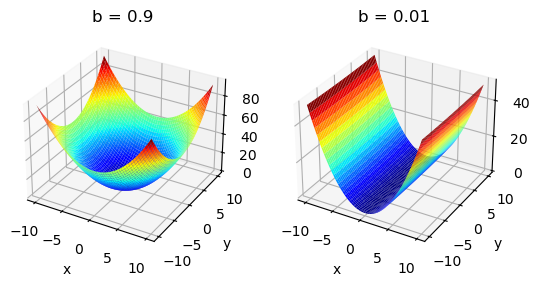

In [2]:
def objective(x):
    return 0.5 * (x[0] ** 2 + b * x[1] ** 2)

def gradiente(x):
    return np.asarray([x[0], b * x[1]])

r_min, r_max = -10.0, + 10.0
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)

# Ver como se comporta la función objetivo con diferentes valores de b
x, y = np.meshgrid(xaxis, yaxis)
v = x, y
b = 0.9
results_09 = objective(v)
b = 0.01
results_001 = objective(v)
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={"projection": "3d"})
ax1.plot_surface(x, y, results_09, cmap='jet')
ax1.set_title('b = 0.9')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.plot_surface(x, y, results_001, cmap='jet')
ax2.set_title('b = 0.01')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()


In [3]:
# Método de gradiente sin momento
b = 0.01
def gradient_descent(objective, initial_guess, gradient, n_iter, step_size):
    solution = initial_guess
    iterations, solutions, scores = list(), list(), list()
    for i in range(n_iter):
        gradient = gradiente(solution)
        solution = solution - step_size * gradient 
        solution_eval = objective(solution)
        # ahora almacenamos las soluciones y los valores de la función objetivo
        iterations.append(i)
        solutions.append(solution)
        scores.append(solution_eval)
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [iterations, solutions, scores]


# Método de gradiente con momento
def gradient_descent_moment(objective, initial_guess, initial_velocity, 
                            gradient, n_iter, step_size_sol, step_size_vel):
    solution = initial_guess
    velocity = initial_velocity
    iterations, solutions, scores = list(), list(), list()
    for i in range(n_iter):
        gradient = gradiente(solution)
        velocity = step_size_vel * velocity - step_size_sol * gradient
        solution = solution + velocity
        solution_eval = objective(solution)
        # ahora almacenamos las soluciones y los valores de la función objetivo
        iterations.append(i)
        solutions.append(solution)
        scores.append(solution_eval)
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [iterations, solutions, scores]

def adagrad(objective, init_guess, gradiente, n_iter, init_step, epsilon=10e-5):

    sol = init_guess
    step = init_step
    grad_sqrt = np.asarray([0., 0.])    
    iterations, sols, scores = [], [], []
    
    for i in range(n_iter):

        grad = gradiente(sol)
        grad_sqrt += grad ** 2
        new_step = step / (np.sqrt(grad_sqrt) + epsilon)
        sol -= new_step * grad
        sol_eval = objective(sol)
        
        iterations.append(i)
        sols.append(sol)
        scores.append(sol_eval)
        
        print(f'{i} f({sol}) = {sol_eval:.5f}')
    
    return iterations, sols, scores

# Fijamos parámetros por defecto
initial_guess = np.asarray([2., 2.])
initial_velocity = np.asarray([0., 0.])
n_iter = 1000
step_size = 0.1
step_size_vel = 0.5

print("Gradiente sin momento:\n")
iterations, solutions, scores = gradient_descent(objective, initial_guess, gradiente, n_iter, step_size)
print("\n\nGradiente con momento:\n")
iterations, solutions, scores_moment = gradient_descent_moment(objective, initial_guess, initial_velocity, gradiente, n_iter, step_size, step_size_vel)
print("\n\nAdagrad:\n")
iterations, solutions, scores_adagrad = adagrad(objective, initial_guess, gradiente, n_iter, step_size)

Gradiente sin momento:

>0 f([1.8   1.998]) = 1.63996
>1 f([1.62     1.996002]) = 1.33212
>2 f([1.458    1.994006]) = 1.08276
>3 f([1.3122     1.99201199]) = 0.88077
>4 f([1.18098    1.99001998]) = 0.71716
>5 f([1.062882   1.98802996]) = 0.58462
>6 f([0.9565938  1.98604193]) = 0.47726
>7 f([0.86093442 1.98405589]) = 0.39029
>8 f([0.77484098 1.98207183]) = 0.31983
>9 f([0.69735688 1.98008976]) = 0.26276
>10 f([0.62762119 1.97810967]) = 0.21652
>11 f([0.56485907 1.97613156]) = 0.17906
>12 f([0.50837317 1.97415543]) = 0.14871
>13 f([0.45753585 1.97218127]) = 0.12412
>14 f([0.41178226 1.97020909]) = 0.10419
>15 f([0.37060404 1.96823888]) = 0.08804
>16 f([0.33354363 1.96627064]) = 0.07496
>17 f([0.30018927 1.96430437]) = 0.06435
>18 f([0.27017034 1.96234007]) = 0.05575
>19 f([0.24315331 1.96037773]) = 0.04878
>20 f([0.21883798 1.95841735]) = 0.04312
>21 f([0.19695418 1.95645893]) = 0.03853
>22 f([0.17725876 1.95450248]) = 0.03481
>23 f([0.15953289 1.95254797]) = 0.03179
>24 f([0.1435796  1.

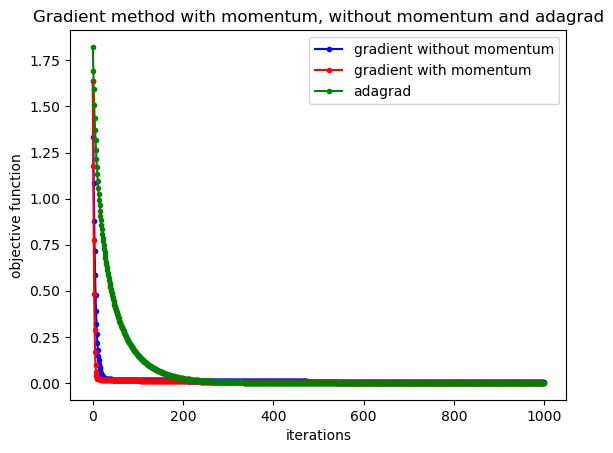

In [4]:
# Comparamos los resultados
fig, ax = plt.subplots()
ax.plot(iterations, scores, '.-', color='blue',  label='gradient without momentum',)
ax.plot(iterations, scores_moment, '.-', color='red', label='gradient with momentum')
ax.plot(iterations, scores_adagrad, '.-', color='green', label='adagrad')
ax.set(xlabel='iterations', ylabel='objective function',
       title='Gradient method with momentum, without momentum and adagrad')
ax.legend()
plt.show()

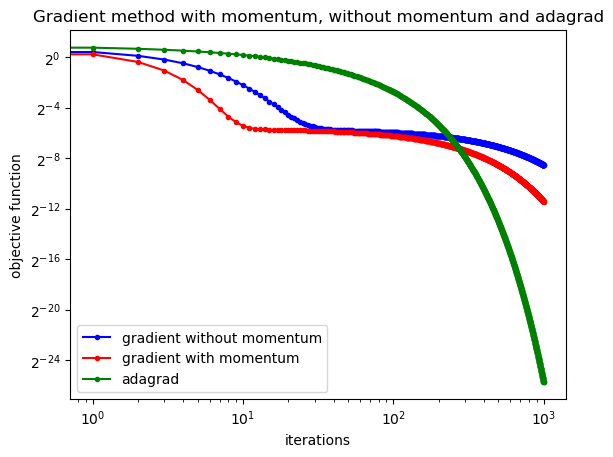

In [5]:
# Para ver qué pasa en las iteraciones finales (donde AdaGrad es mejor) cambio la escala del dibujo usando una escala 
# logarítmica en base 10 para las iteraciones y en base 2 para el coste.
fig, ax = plt.subplots()
ax.plot(iterations, scores, '.-', color='blue',  label='gradient without momentum',)
ax.plot(iterations, scores_moment, '.-', color='red', label='gradient with momentum')
ax.plot(iterations, scores_adagrad, '.-', color='green', label='adagrad')
ax.set(xlabel='iterations', ylabel='objective function',
       title='Gradient method with momentum, without momentum and adagrad')
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=2)
ax.legend()
plt.show()

Observamos que el método de gradiente y el de gradiente con momento convergen muy rápido en las primeras iteraciones y lentamente en las últimas, mientras tanto AdaGrad, converge más lentamete en las primeras y muy rápido en las últimas. Esto se debe a que los métodos de gradiente tradicionales comienzan rápido y se desaceleran cerca del mínimo, mientras que AdaGrad comienza con más cautela pero acelera en las etapas finales gracias a su ajuste adaptativo de la tasa de aprendizaje.